In [6]:
import pickle
import random
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.manifold import TSNE

from src.parse_data import (
    TEXT_AUDIO_EMBED_MEAN,
    AUDIO_EMBED_MEAN,
    TEXT_IMAGEBIND_VIDEO_EMBED_MEAN,
    VIDEO_IMAGEBIND_EMBED_MEAN
)
from src.enums import Modality, DatasetType

In [7]:
def get_data_paths(dataset_type):
    gap_path = None
    if dataset_type == DatasetType.Video:
        data_path = '/pasteur/u/esui/data/c3/data_video_msrvtt_imagebind_train.pkl'
        text_mean_path = TEXT_IMAGEBIND_VIDEO_EMBED_MEAN
        x_mean_path = VIDEO_IMAGEBIND_EMBED_MEAN
    elif dataset_type == DatasetType.Audio:
        data_path = '/pasteur/u/esui/data/c3/data_audio_clotho_imagebind_train.pkl'
        text_mean_path = TEXT_AUDIO_EMBED_MEAN
        x_mean_path = AUDIO_EMBED_MEAN
    else:
        raise NotImplementedError(f"dataset type {dataset_type} not implemented")
    
    print(data_path)
    print(text_mean_path)
    print(x_mean_path)
    return data_path, text_mean_path, x_mean_path, gap_path


def sample_embeds(modality, n, dataset_type):
    data_path, text_mean_path, x_mean_path, gap_path = get_data_paths(dataset_type)

    if modality == Modality.Vision:
        embed_mean_path = x_mean_path
        input_type = "inputs"
    else:
        embed_mean_path = text_mean_path
        input_type = "captions"
    
    print("=> Loading mean")
    with open(embed_mean_path, 'rb') as f:
        embed_mean = pickle.load(f)
    
    with open(data_path, 'rb') as f:
        all_data = pickle.load(f)

    data = all_data[input_type]
    
    indices = random.sample(list(data.keys()), n)
    
    embeds = [data[idx]["embed"].squeeze().numpy() for idx in indices]
    embeds = np.stack(embeds)
    embeds = embeds / np.linalg.norm(embeds, axis=1).reshape(-1, 1)
    
    return embeds, embed_mean


def plot(dataset_type, n=100):
    embeds_language, embed_mean_language = sample_embeds(Modality.Language, n, dataset_type)
    embeds_vision, embed_mean_vision = sample_embeds(Modality.Vision, n, dataset_type)
    print(embed_mean_language.shape)
    print(embed_mean_vision.shape)
    
    tsne = TSNE()
    
    embeds = np.vstack([embeds_language, embeds_vision])
    embeds_removed_mean = np.vstack([embeds_language - embed_mean_language.numpy(),
                                    embeds_vision - embed_mean_vision.numpy()])
    
    two_dimensional_embeds = tsne.fit_transform(embeds)
    
    plt.clf()
    plt.figure()
    plt.title(f"normed embeds")
    plt.scatter(two_dimensional_embeds[:n, 0], two_dimensional_embeds[:n, 1], color='red')
    plt.scatter(two_dimensional_embeds[n:, 0], two_dimensional_embeds[n:, 1], color='blue')
    plt.show()
    
    two_dimensional_embeds = tsne.fit_transform(embeds_removed_mean)
    
    plt.clf()
    plt.figure()
    plt.title(f"normed embeds removed mean")
    plt.scatter(two_dimensional_embeds[:n, 0], two_dimensional_embeds[:n, 1], color='red')
    plt.scatter(two_dimensional_embeds[n:, 0], two_dimensional_embeds[n:, 1], color='blue')
    plt.show()

    plt.clf()
    plt.figure()
    plt.title(f"normed embeds removed mean add noise")
    plt.scatter(two_dimensional_embeds[:n, 0], two_dimensional_embeds[:n, 1], color='red')
    plt.scatter(two_dimensional_embeds[n:, 0], two_dimensional_embeds[n:, 1], color='blue')
    plt.show()
    
def compute_residual(dataset_type, n=200):
    embeds_language, embed_mean_language = sample_embeds(Modality.Language, n, dataset_type)
    embeds_vision, embed_mean_vision = sample_embeds(Modality.Vision, n, dataset_type)
    
    gap = embeds_language - embeds_vision
    print(f"Norm of gap before subtracting means: {np.linalg.norm(gap)}")
    gap = (embeds_language - embed_mean_language.numpy()) - (embeds_vision - embed_mean_vision.numpy())
    print(f"Norm of gap after subtracting means: {np.linalg.norm(gap)}")


/pasteur/u/esui/data/c3/data_audio_clotho_imagebind_train.pkl
/pasteur/u/esui/data/c3/normalized_text_imagebind_embed_mean.pkl
/pasteur/u/esui/data/c3/normalized_text_audio_imagebind_embed_mean.pkl
=> Loading mean
/pasteur/u/esui/data/c3/data_audio_clotho_imagebind_train.pkl
/pasteur/u/esui/data/c3/normalized_text_imagebind_embed_mean.pkl
/pasteur/u/esui/data/c3/normalized_text_audio_imagebind_embed_mean.pkl
=> Loading mean
torch.Size([1, 1024])
torch.Size([1, 1024])


<Figure size 640x480 with 0 Axes>

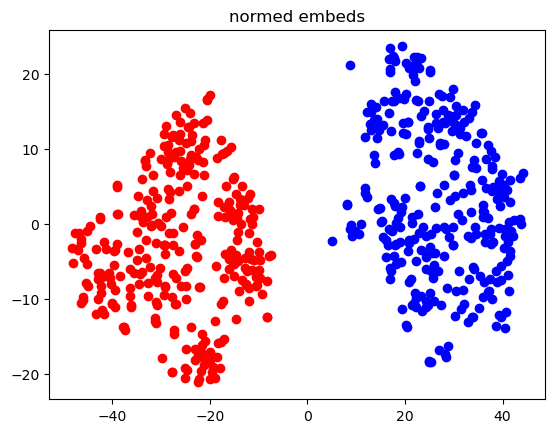

<Figure size 640x480 with 0 Axes>

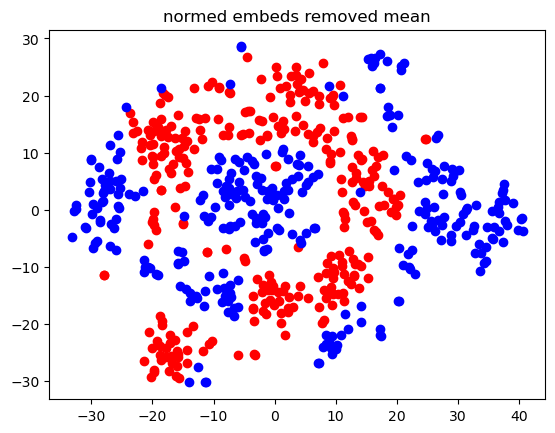

<Figure size 640x480 with 0 Axes>

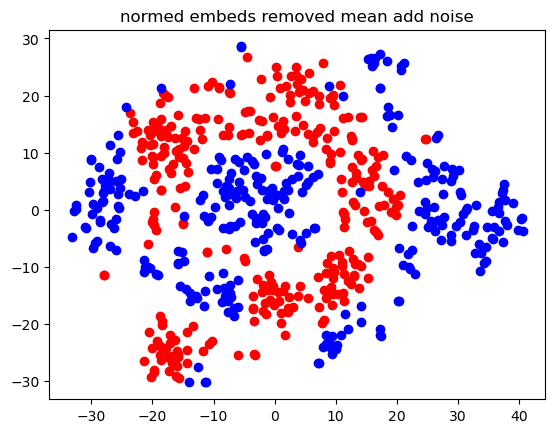

/pasteur/u/esui/data/c3/data_audio_clotho_imagebind_train.pkl
/pasteur/u/esui/data/c3/normalized_text_imagebind_embed_mean.pkl
/pasteur/u/esui/data/c3/normalized_text_audio_imagebind_embed_mean.pkl
=> Loading mean
/pasteur/u/esui/data/c3/data_audio_clotho_imagebind_train.pkl
/pasteur/u/esui/data/c3/normalized_text_imagebind_embed_mean.pkl
/pasteur/u/esui/data/c3/normalized_text_audio_imagebind_embed_mean.pkl
=> Loading mean
Norm of gap before subtracting means: 19.658878326416016
Norm of gap after subtracting means: 17.70608139038086


In [8]:
plot(dataset_type='audio', n=300)
compute_residual(dataset_type='audio')

/pasteur/u/esui/data/c3/data_video_msrvtt_imagebind_train.pkl
/pasteur/u/esui/data/c3/normalized_text_imagebind_video_embed_mean.pkl
/pasteur/u/esui/data/c3/normalized_text_video_imagebind_embed_mean.pkl
=> Loading mean
/pasteur/u/esui/data/c3/data_video_msrvtt_imagebind_train.pkl
/pasteur/u/esui/data/c3/normalized_text_imagebind_video_embed_mean.pkl
/pasteur/u/esui/data/c3/normalized_text_video_imagebind_embed_mean.pkl
=> Loading mean
torch.Size([1, 1024])
torch.Size([1, 1024])


<Figure size 640x480 with 0 Axes>

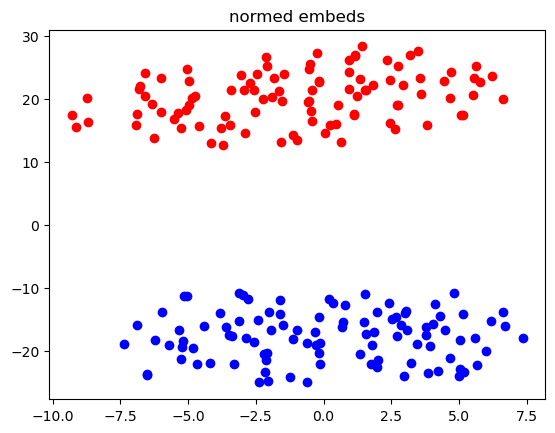

<Figure size 640x480 with 0 Axes>

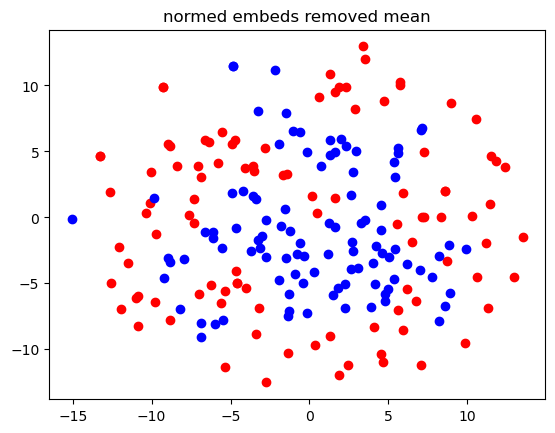

<Figure size 640x480 with 0 Axes>

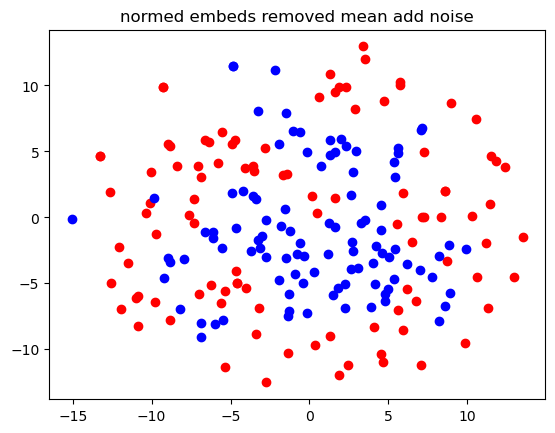

/pasteur/u/esui/data/c3/data_video_msrvtt_imagebind_train.pkl
/pasteur/u/esui/data/c3/normalized_text_imagebind_video_embed_mean.pkl
/pasteur/u/esui/data/c3/normalized_text_video_imagebind_embed_mean.pkl
=> Loading mean
/pasteur/u/esui/data/c3/data_video_msrvtt_imagebind_train.pkl
/pasteur/u/esui/data/c3/normalized_text_imagebind_video_embed_mean.pkl
/pasteur/u/esui/data/c3/normalized_text_video_imagebind_embed_mean.pkl
=> Loading mean
Norm of gap before subtracting means: 19.019594192504883
Norm of gap after subtracting means: 16.366703033447266


In [9]:
plot(dataset_type='video')
compute_residual(dataset_type='video')